In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
datasets = [
        "adult",
        "german",
        "compas",
        "diabetes",
        "breast_cancer",
        ]

attack_list = [
        'deepfool', 
        'carlini_l_2', 
        # 'carlini_l_inf', 
        # 'lowprofool_l_2', 
        # 'lowprofool_l_inf', 
        # 'fgsm_l_1',
        # 'fgsm_l_2',
        'fgsm_l_inf',
        # 'bim',
        # 'mim',
        # 'pgd_l_1',
        # 'pgd_l_2',
        'pgd_l_inf',

        # 'boundary', 
        # 'hopskipjump_l_2', 'hopskipjump_l_inf'
        ]

def compare_cols(row):
    if row['ground_truth'] != row['adv_prediction']:
        return 1
    else:
        return 0

In [3]:
data_list_list=[]
for dataset in datasets:
    data_list = []
    for attack in attack_list:
        folder_name = f'{attack}_{dataset}'
        file_name_lr = f'eval_{folder_name}_lr_result_0.csv'
        result_path_lr = f'./results/{folder_name}/{file_name_lr}'
        file_name_svc = f'eval_{folder_name}_svc_result_0.csv'
        result_path_svc = f'./results/{folder_name}/{file_name_svc}'
        file_name_nn = f'eval_{folder_name}_nn_2_result_0.csv'
        result_path_nn = f'./results/{folder_name}/{file_name_nn}'

        df1 = pd.read_csv(result_path_lr)
        df2 = pd.read_csv(result_path_svc)
        df3 = pd.read_csv(result_path_nn)

        data1 = df1[['eval_L2', 'eval_Sen', 'eval_Mahalanobis', 'ground_truth', 'adv_prediction']]
        data1['model'] = 'LR'

        data2 = df2[['eval_L2', 'eval_Sen', 'eval_Mahalanobis', 'ground_truth', 'adv_prediction']]
        data2['model'] = 'SVC'

        data3 = df3[['eval_L2', 'eval_Sen', 'eval_Mahalanobis', 'ground_truth', 'adv_prediction']]
        data3['model'] = 'MLP'


        data = pd.concat([data1, data2 , data3], axis=0) # data2
        data['attack'] = attack 
        data['dataset'] = dataset
        data_list.append(data)
    
    data_list_df = pd.concat(data_list, axis=0)

    data_list_df['attack_success'] = data_list_df.apply(compare_cols, axis=1)
    # data_list_df.to_csv(f'{dataset}_l2_success.csv')

    data_list_list.append(data_list_df)


C:\Users\n10599070\AppData\Local\Temp\ipykernel_70644\716472048.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['model'] = 'LR'
C:\Users\n10599070\AppData\Local\Temp\ipykernel_70644\716472048.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['model'] = 'SVC'
C:\Users\n10599070\AppData\Local\Temp\ipykernel_70644\716472048.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [4]:
data_list_list_df = pd.concat(data_list_list, axis=0)
data_list_list_df = data_list_list_df.astype({'eval_L2':float, 'eval_Sen':float, 'eval_Mahalanobis':float, 'attack_success': float})


In [5]:
# replace cell values
data_list_list_df['attack'] = data_list_list_df['attack'].replace('fgsm_l_inf', 'FGSM Linf')
data_list_list_df['attack'] = data_list_list_df['attack'].replace('pgd_l_inf', 'PGD Linf')
data_list_list_df['attack'] = data_list_list_df['attack'].replace('carlini_l_2', 'C&W L2')
data_list_list_df['attack'] = data_list_list_df['attack'].replace('deepfool', 'DeepFool')

data_list_list_df['dataset'] = data_list_list_df['dataset'].replace('adult', 'Adult')
data_list_list_df['dataset'] = data_list_list_df['dataset'].replace('german', 'German')
data_list_list_df['dataset'] = data_list_list_df['dataset'].replace('compas', 'Compas')
data_list_list_df['dataset'] = data_list_list_df['dataset'].replace('diabetes', 'Diabetes')
data_list_list_df['dataset'] = data_list_list_df['dataset'].replace('breast_cancer', 'Breast Cancer')

In [6]:
# data_list_list_df.to_csv(f'all_imp.csv')

c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


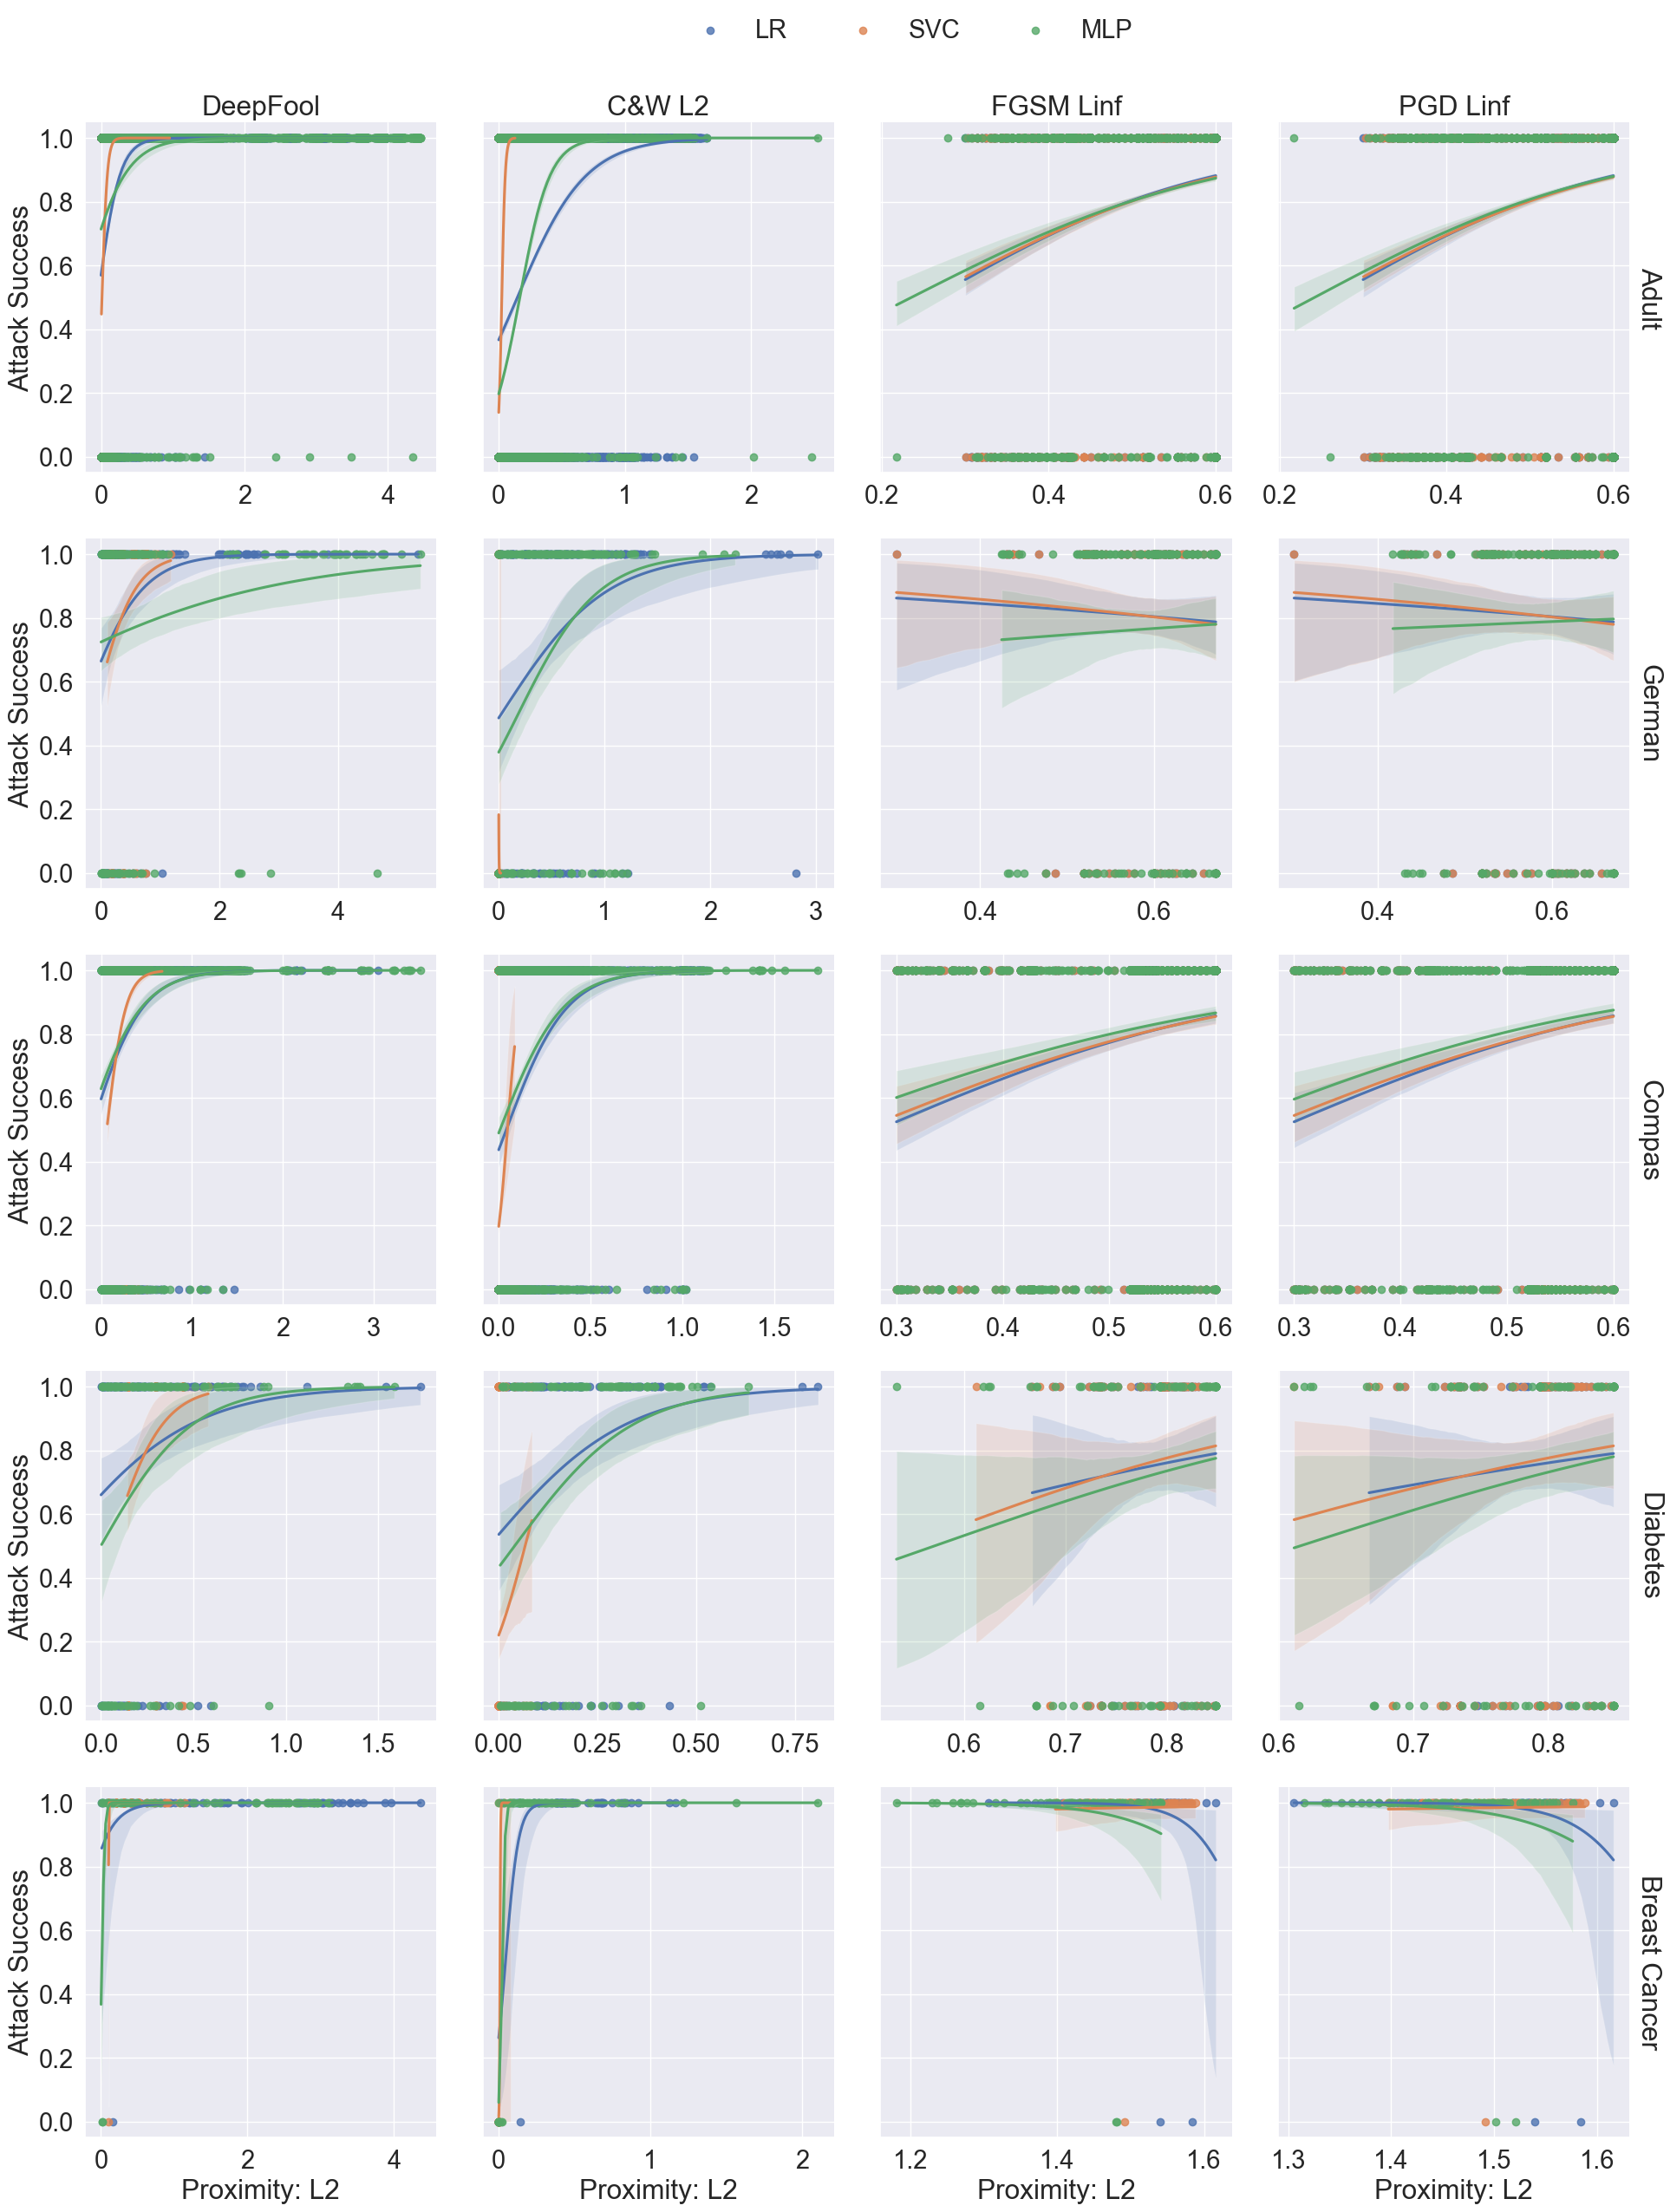

In [7]:

sns.set_theme()
sns.set(font_scale=1.9)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data_list_list_df,
    x="eval_L2", y="attack_success", 
    hue="model", col='attack', row='dataset',
    # height=5,
    logistic=True,
    facet_kws=dict(sharex=False, sharey=True, margin_titles=True),
)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# Use more informative axis labels than are provided by default
g.set_axis_labels("Proximity: L2", "Attack Success")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)

# g.set_titles("Dataset: Diabetes  Attack: FGSM Linf")
# g.set(title="Dataset: Diabetes  Attack: FGSM Linf")
# sns.plt.show()

c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


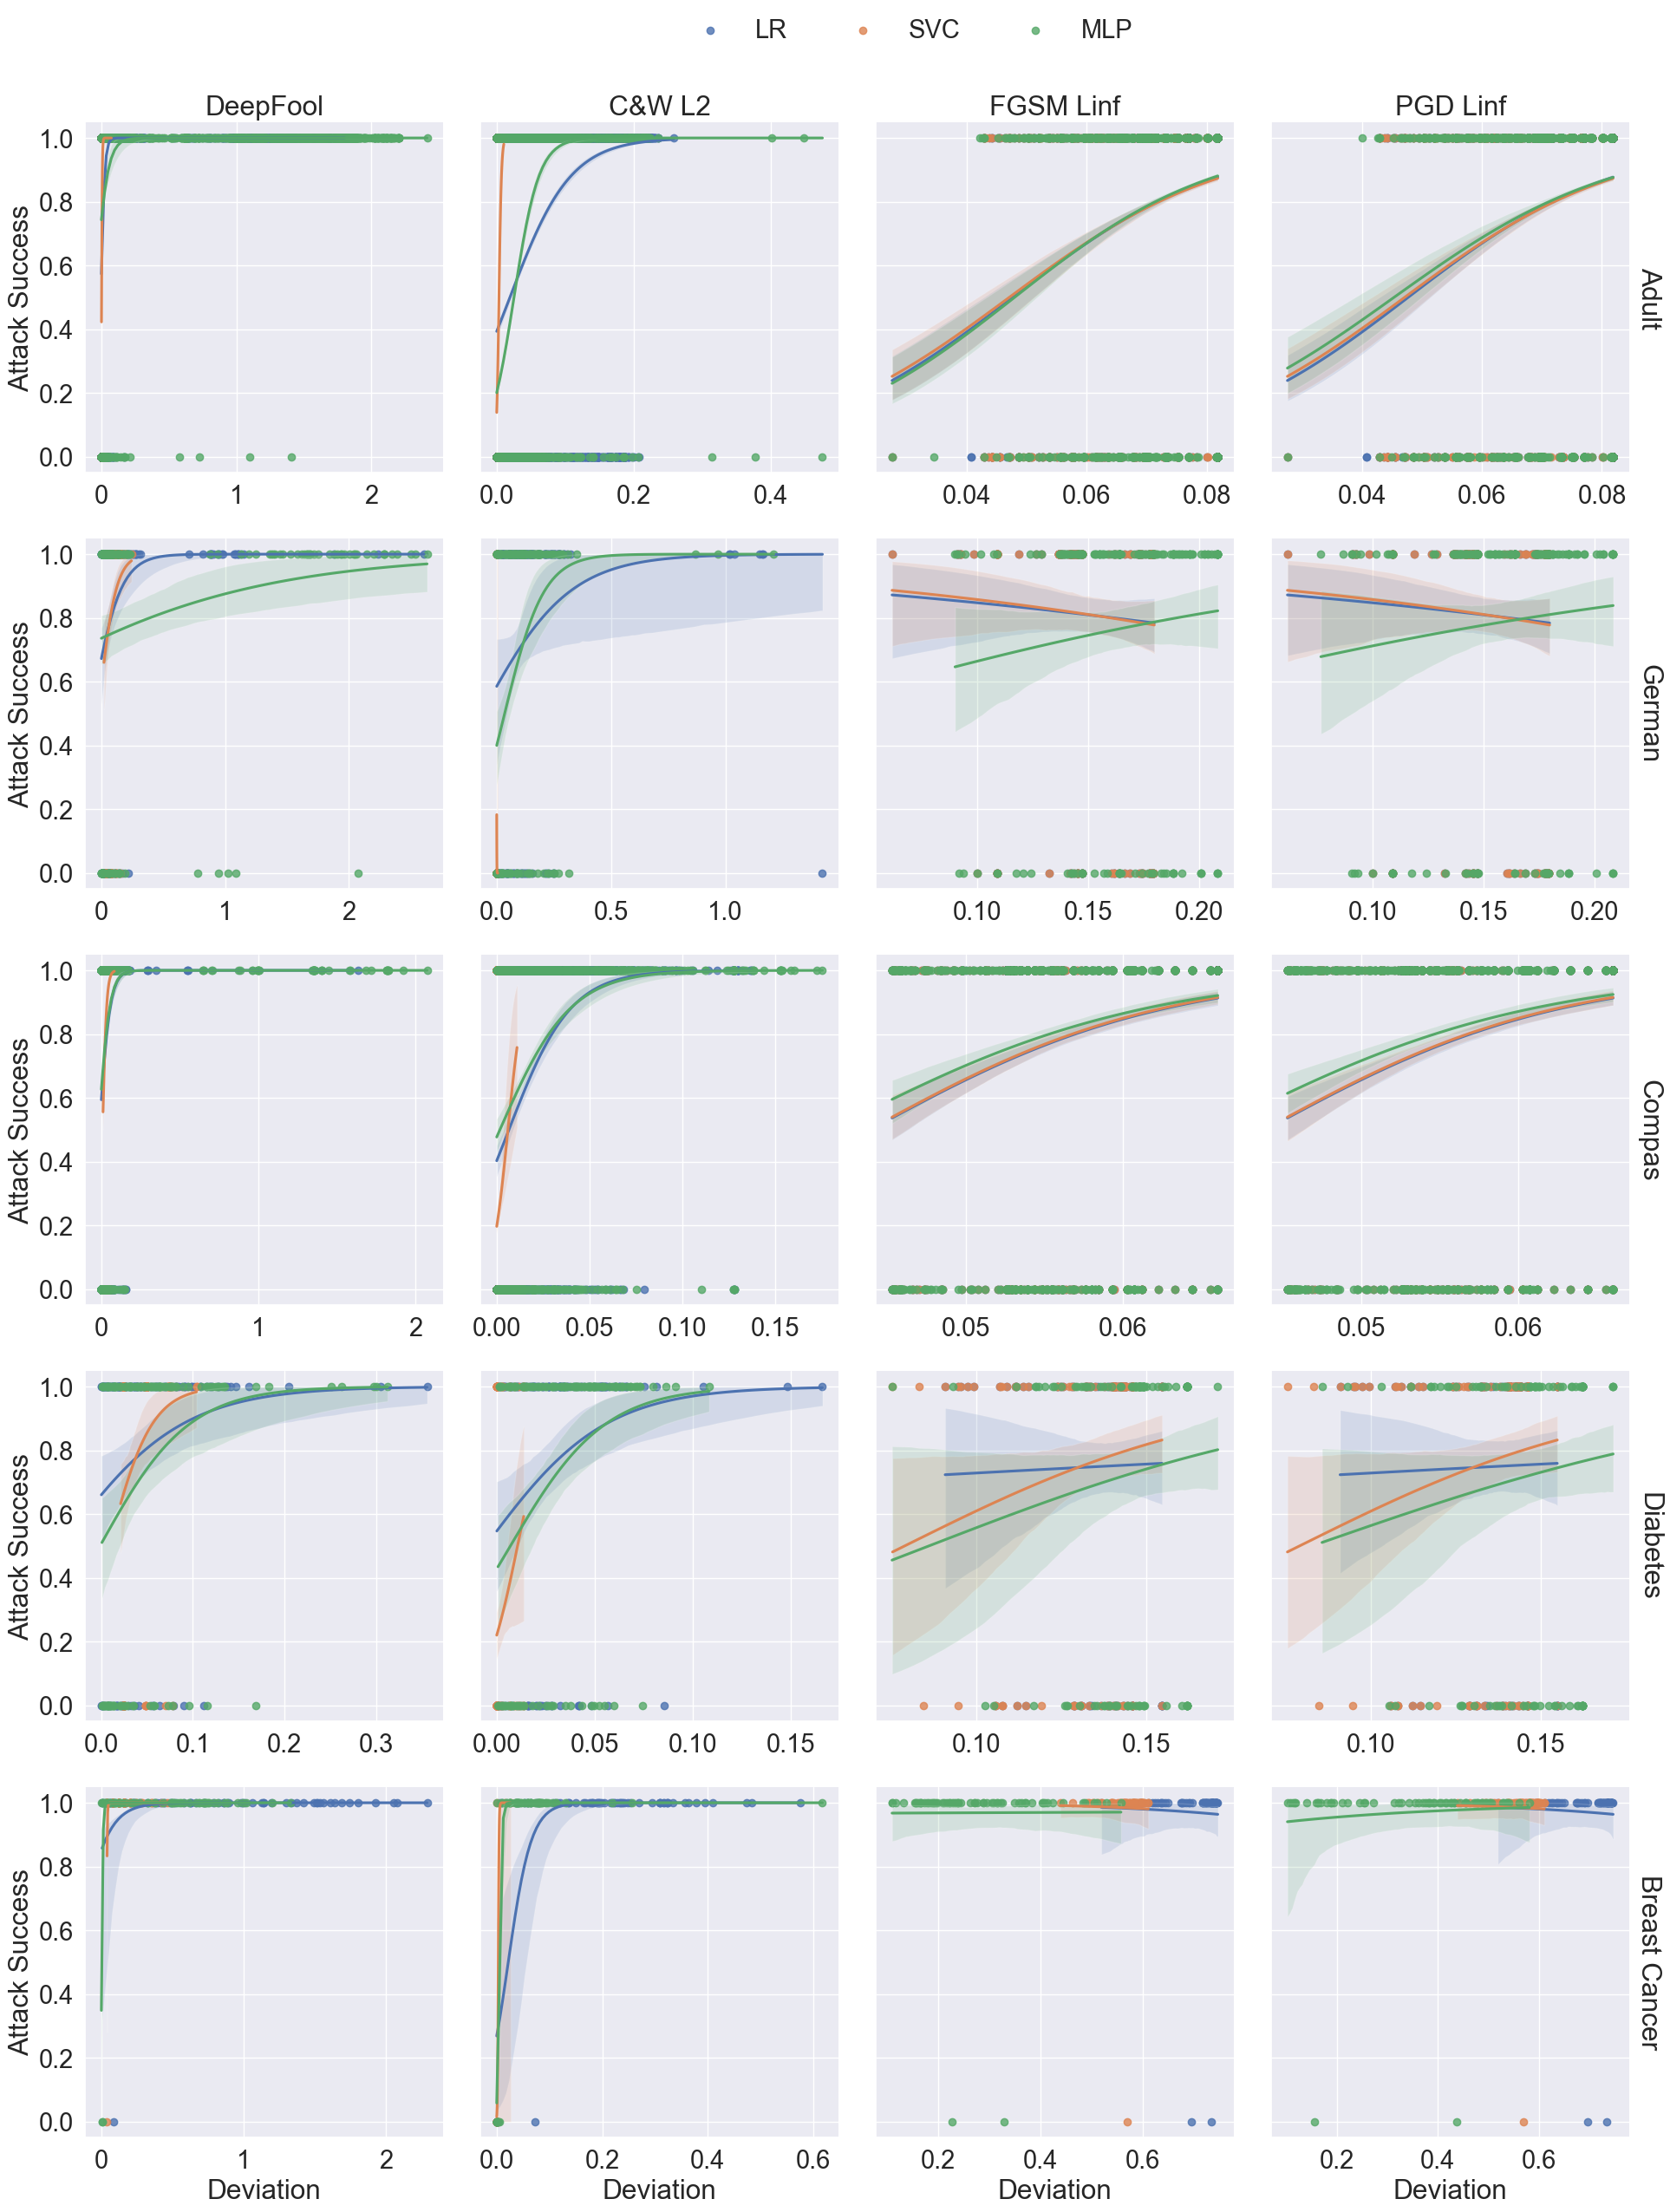

In [8]:

sns.set_theme()
sns.set(font_scale=1.9)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data_list_list_df,
    x="eval_Mahalanobis", y="attack_success", 
    hue="model", col='attack', row='dataset',
    # height=5,
    logistic=True,
    facet_kws=dict(sharex=False, sharey=True, margin_titles=True),
)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# Use more informative axis labels than are provided by default
g.set_axis_labels("Deviation", "Attack Success")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
# g.set_titles("Dataset: Diabetes  Attack: FGSM Linf")
# g.set(title="Dataset: Diabetes  Attack: FGSM Linf")
# sns.plt.show()

c:\Users\n10599070\Miniconda3\envs\xai\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


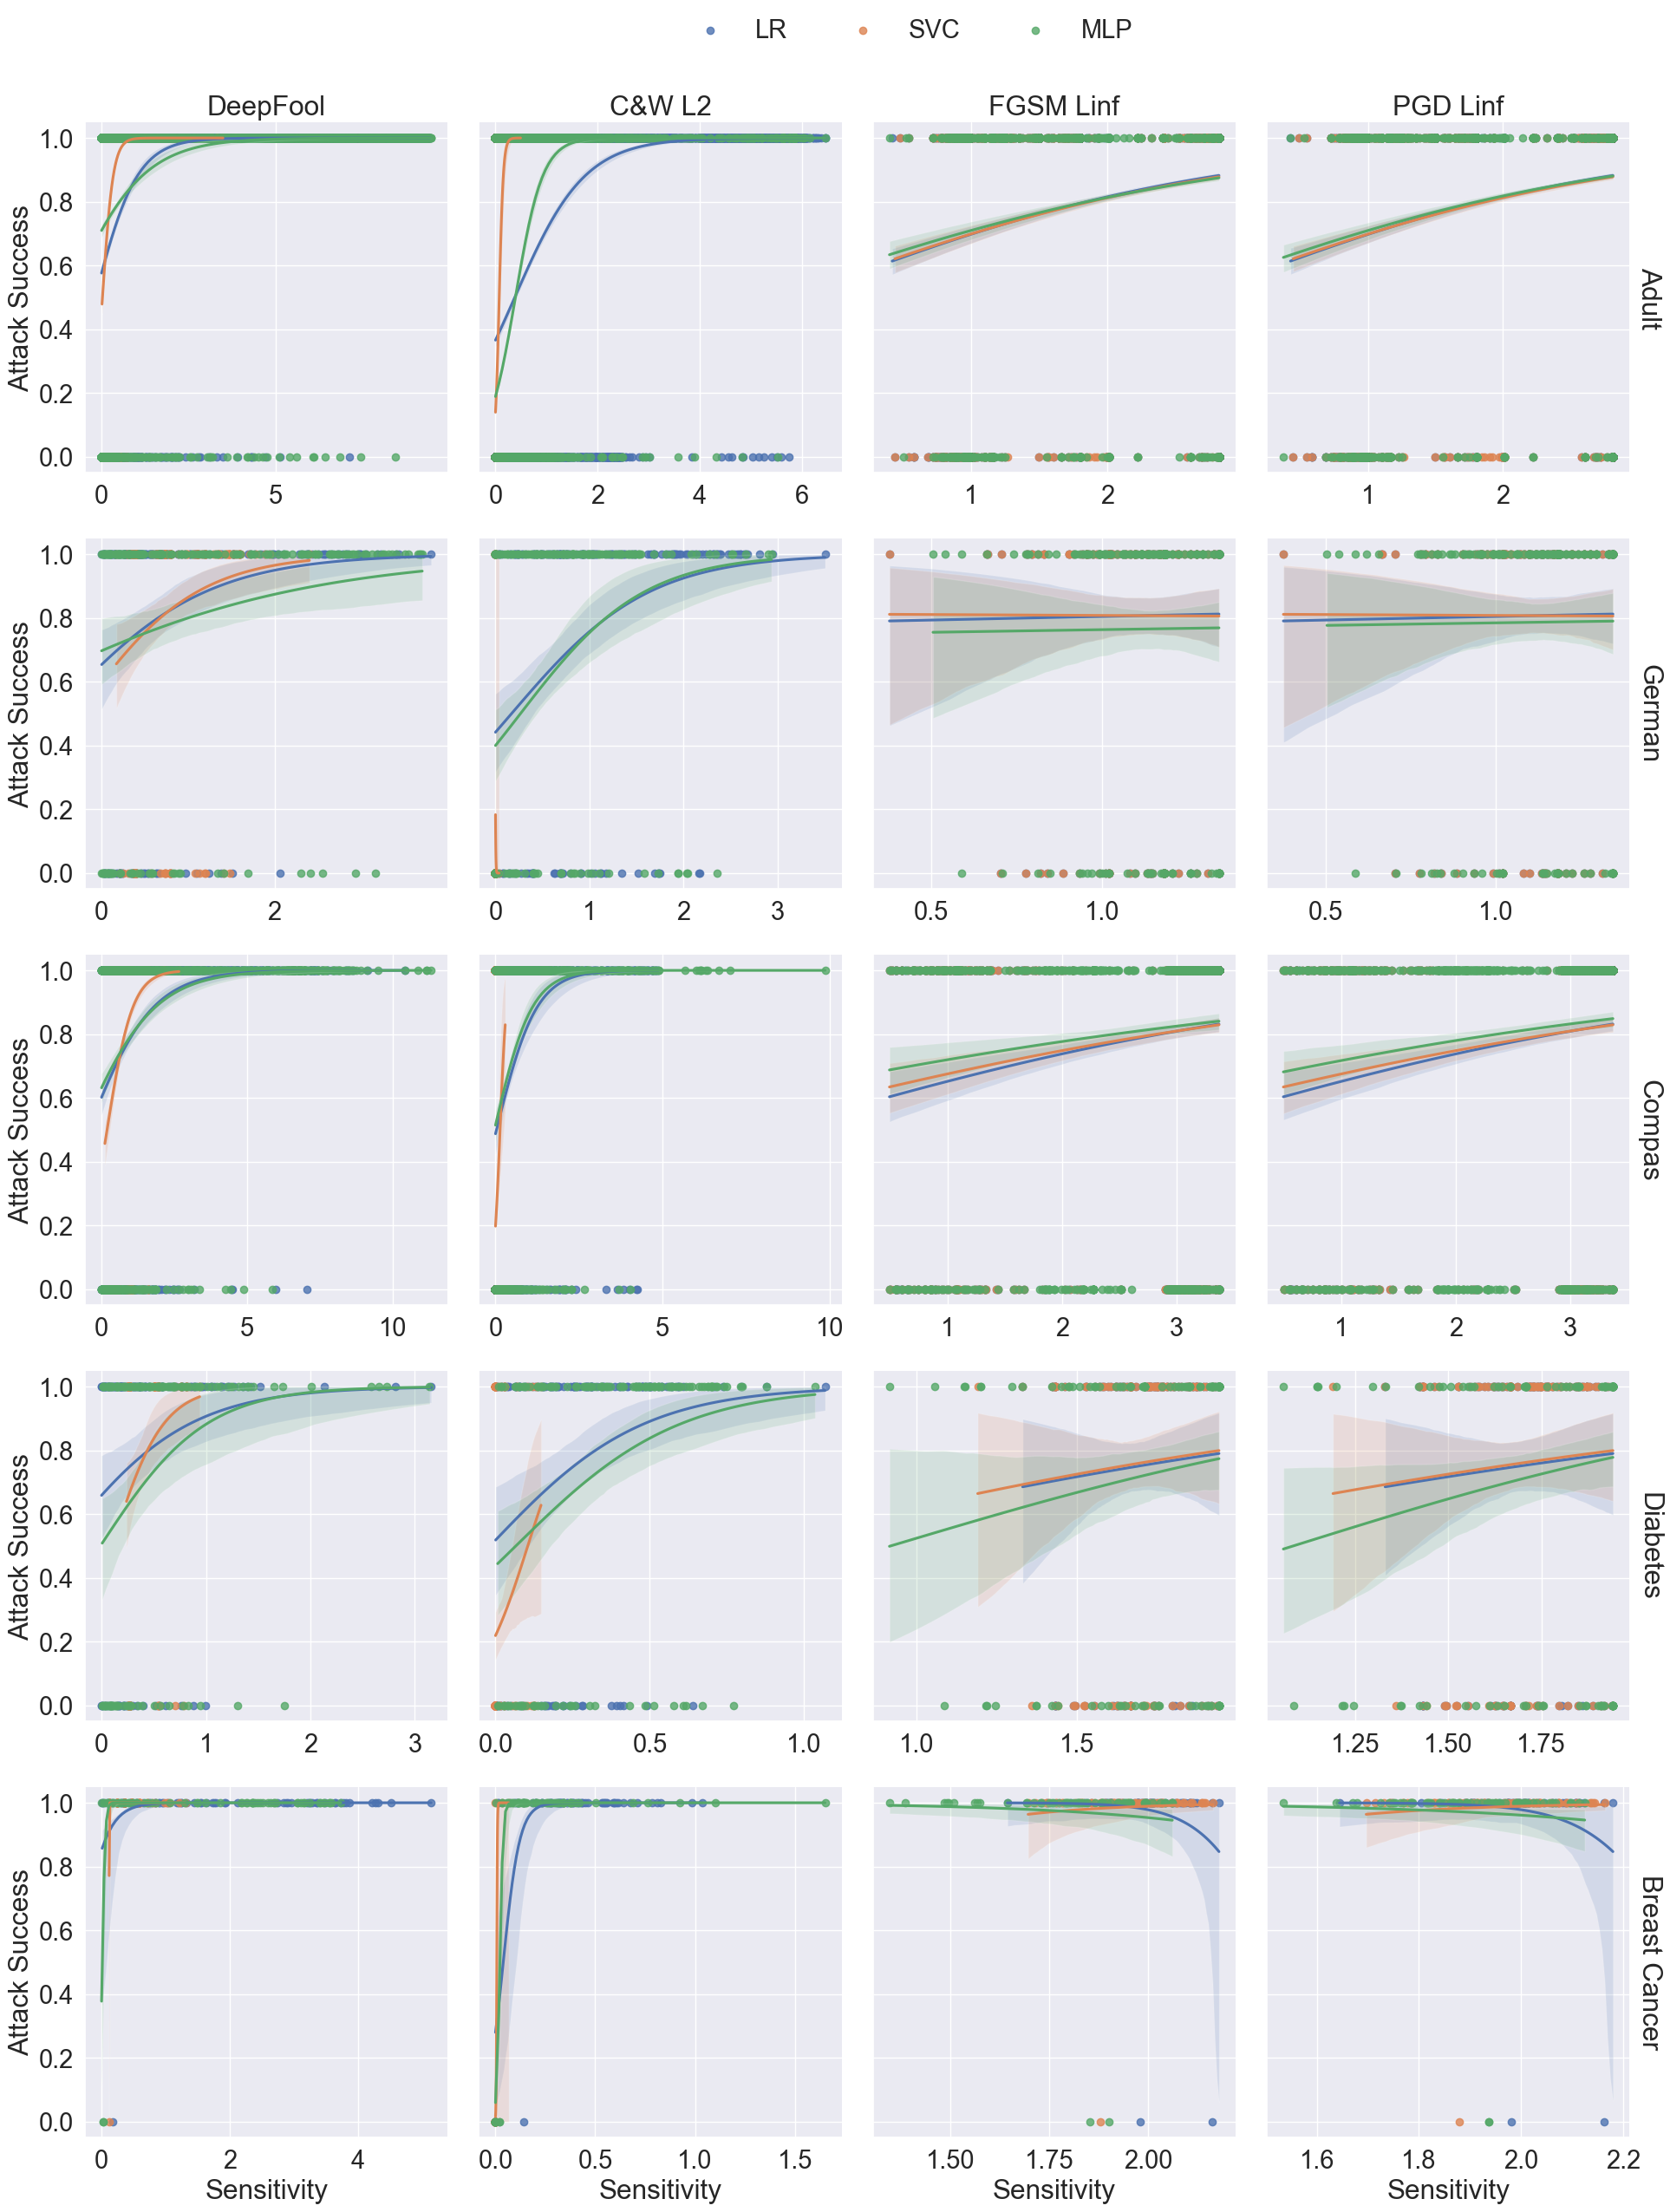

In [9]:

sns.set_theme()
sns.set(font_scale=1.9)

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=data_list_list_df,
    x="eval_Sen", y="attack_success", 
    hue="model", col='attack', row='dataset',
    # height=5,
    logistic=True,
    facet_kws=dict(sharex=False, sharey=True, margin_titles=True),
)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# Use more informative axis labels than are provided by default
g.set_axis_labels("Sensitivity", "Attack Success")
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
# g.set_titles("Dataset: Diabetes  Attack: FGSM Linf")
# g.set(title="Dataset: Diabetes  Attack: FGSM Linf")
# sns.plt.show()

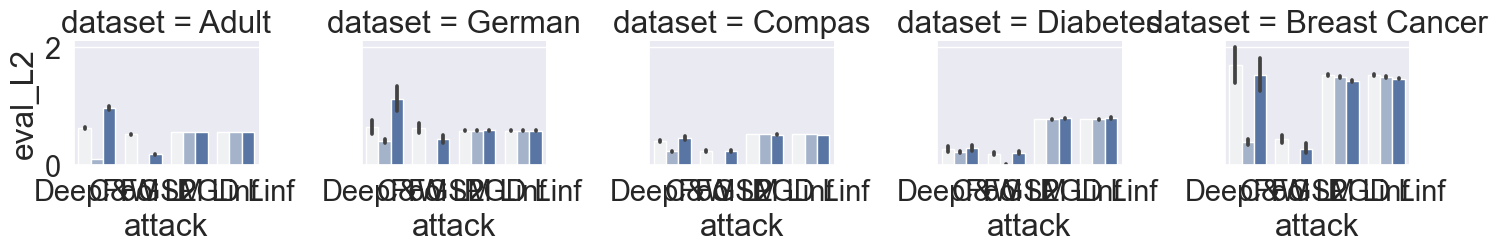

In [10]:
m = sns.FacetGrid(data=data_list_list_df, col='dataset')
m.map_dataframe(sns.barplot, x="attack", y="eval_L2", hue="model",)

# astype({'eval_L2':float, 'eval_Sen':float, 'eval_Mahalanobis':float, 'attack_success': float})